In [37]:
from pathlib import Path
from IPython.display import display, HTML
from typing import List, Dict, Any
import numpy.typing as npt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


The dataaset is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [38]:
DATASET_PATH = Path("/path/to/dataset.csv") # upload your dataset, and copy the path here, then read the code from the top always, cos the packages/modules are at the top above.

# read the dataset
df = pd.read_csv(DATASET_PATH,index_col=False)
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,04-May,Left wheel,Silver,12


In [7]:
print("The total number of rows in the dataset are = {}".format(df.shape[0]))
print("The total number of columns in the dataset are = {}".format(df.shape[1]))

The total number of rows in the dataset are = 19237
The total number of columns in the dataset are = 18


In [8]:
new_df = df.drop(['ID'], axis=1) #Drop ID column cos it is used for tracking, not an important feature.
new_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4


In [9]:
print(f"The dataset has now {new_df.shape} rows and columns")

The dataset has now (19237, 17) rows and columns


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Doors             19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
dtypes: int64(4),

In [11]:
new_df.isna().sum()     #checking for nan values, so there is none according to python, but there are "dash" in Levy column, that we shall remove later.

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

The dtype (data type) information provided for each column in the dataset indicates how the data is stored and interpreted by the Python interpreter or pandas Dataframe.
1. **Price:**
   - Dtype: int64
   - Interpretation: The "Price" column contains integer values representing the price of the car. The int64 dtype indicates that these values are stored as 64-bit integers.

2. **Levy:**
   - Dtype: object
   - Interpretation: The "Levy" column contains object values. The object dtype typically indicates that the data is stored as strings. However, since "Levy" likely represents a numerical value (e.g., tax or levy associated with the car), it's possible that some non-numeric values or missing values are present, causing pandas to interpret the column as an object dtype.

3. **Manufacturer, Model, Category, Leather interior, Fuel type, Engine volume, Mileage, Gear box type, Drive wheels, Doors, Wheel, Color:**
   - Dtype: object
   - Interpretation: These columns contain categorical or string values representing various attributes of the cars, such as manufacturer, model, category, fuel type, etc. The object dtype indicates that these values are stored as strings.

4. **Prod. year:**
   - Dtype: int64
   - Interpretation: The "Prod. year" column contains integer values representing the production year of the cars. Similar to the "Price" column, the int64 dtype indicates that these values are stored as 64-bit integers.

5. **Cylinders, Airbags:**
   - Dtype: int64
   - Interpretation: These columns contain integer values representing the number of cylinders and airbags in the cars, respectively. The int64 dtype indicates that these values are stored as 64-bit integers.

In summary, the dtype for the values in the dataset are of int64, and object.

In [12]:
new_df.dtypes

Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [13]:
new_df["Model"].duplicated().sum()   #We see that the rows have duplicates values but this information are crucial to the dataset, so we are not removing any duplicates.

17647

The dataset's statistical analysis reveals that the average price of cars is approximately $18,556, with a standard deviation of approximately $190,581.

The prices range from $1 to approximately $26,307,500. The average production year of the cars is approximately 2010.91, with a standard deviation of approximately 5.67.

The production years range from 1939 to 2020. On average, cars have approximately 4.58 cylinders, with a standard deviation of approximately 1.20.

The number of cylinders ranges from 1 to 16. Additionally, the average number of airbags in cars is approximately 6.58, with a standard deviation of approximately 4.32. The number of airbags ranges from 0 to 16.




In [14]:
new_df.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


We need to do some data visualization to see the relationship between the features in the dataset.

The analysis reveals that the "Price" variable exhibits a high positive skewness of 136.46, indicating a heavy right tail, suggesting a need for transformation. Similarly, the "Production Year" variable demonstrates a moderate negative skewness of -2.08, indicating a left skew, also recommending transformation. "Cylinders" display a moderate positive skewness of 2.09, indicating a right skew, suggesting transformation. Conversely, "Airbags" exhibit only slight positive skewness of 0.082, implying minimal skewness, and may not require transformation. It's noteworthy that overflow issues are encountered during the transformation process for some variables, as indicated by runtime warnings.

In [15]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

def data_skewness(df: pd.DataFrame) -> None:

    numeric_features = df.select_dtypes(include=[np.number])
    numeric_feature_names = numeric_features.columns
    #print(numeric_features)

    for feature in numeric_feature_names:
        skewness = skew(df[feature])
        print(f"Skewness of {feature}: {skewness}")
        if abs(skewness) > 0.5:
            print(f"{feature} is skewed. Applying transformation.")
            # Apply transformation
            pt = PowerTransformer()
            df[feature] = pt.fit_transform(df[[feature]])

    return df

df_processed = data_skewness(new_df)


Skewness of Price: 136.45978506668632
Price is skewed. Applying transformation.
Skewness of Prod. year: -2.082098398678488
Prod. year is skewed. Applying transformation.
Skewness of Cylinders: 2.090920430414953
Cylinders is skewed. Applying transformation.
Skewness of Airbags: 0.0820054156446599


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


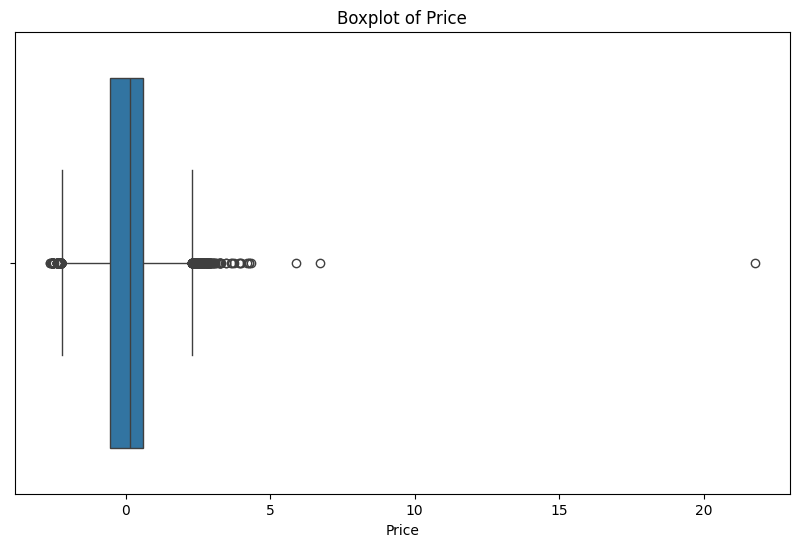

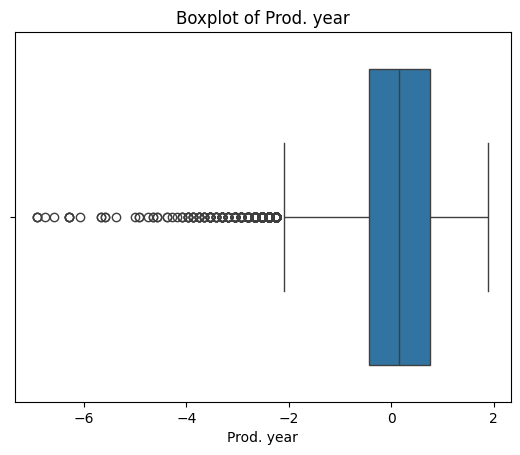

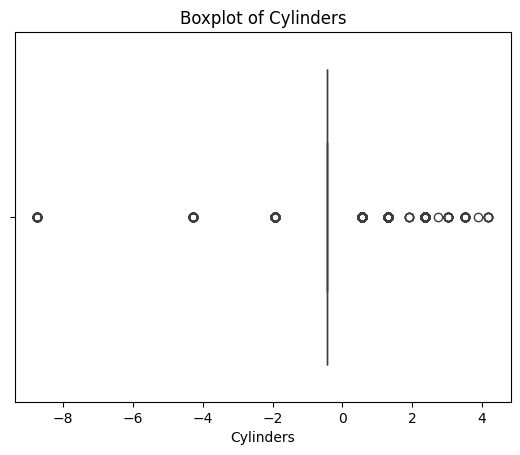

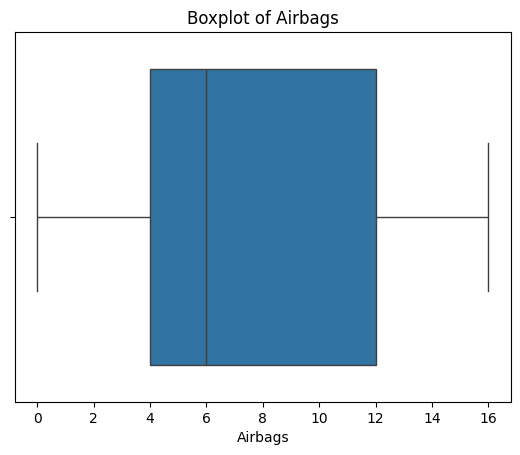

In [16]:
def visualize_boxplot(df):
    """Visualize boxplots for numeric columns to detect outliers."""
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    plt.figure(figsize=(10, 6))
    for col in numeric_cols:
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

visualize_boxplot(new_df)

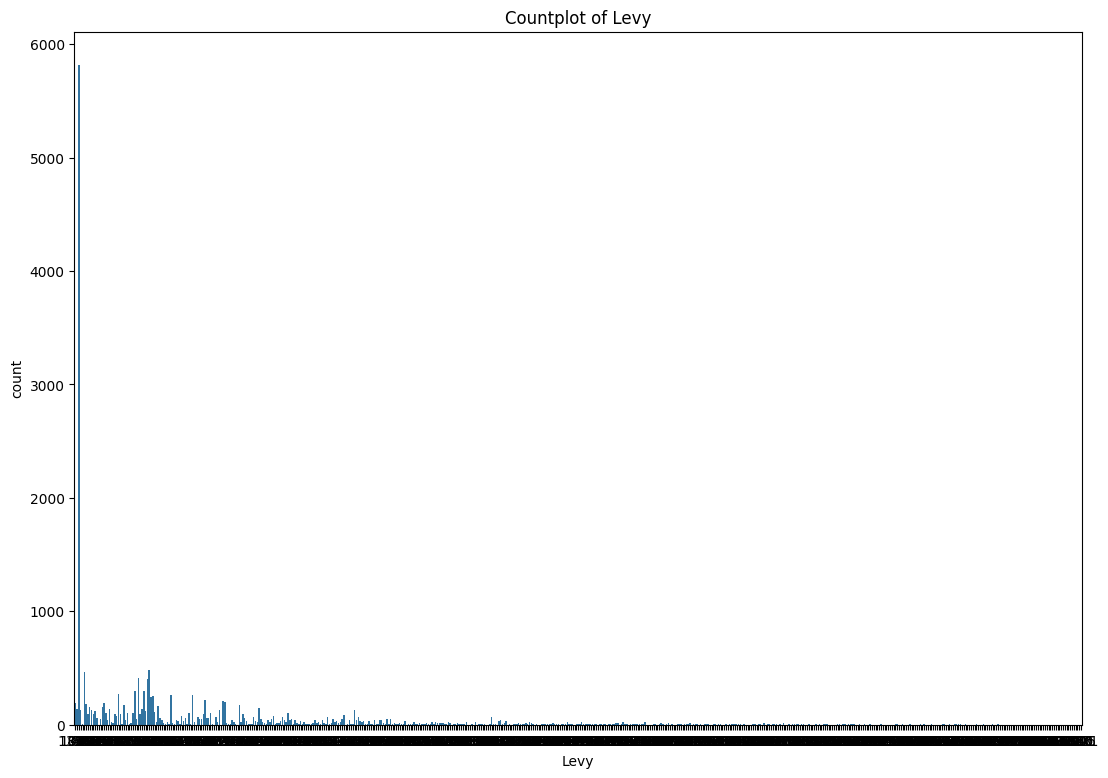

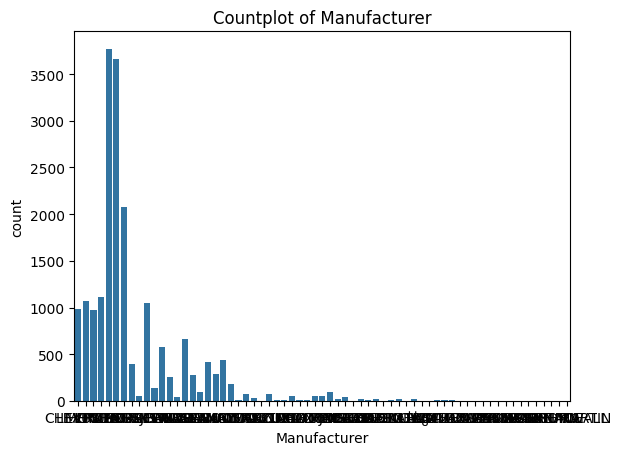

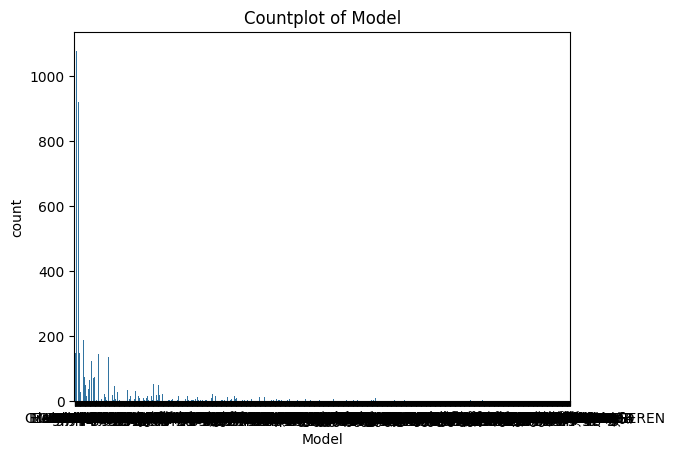

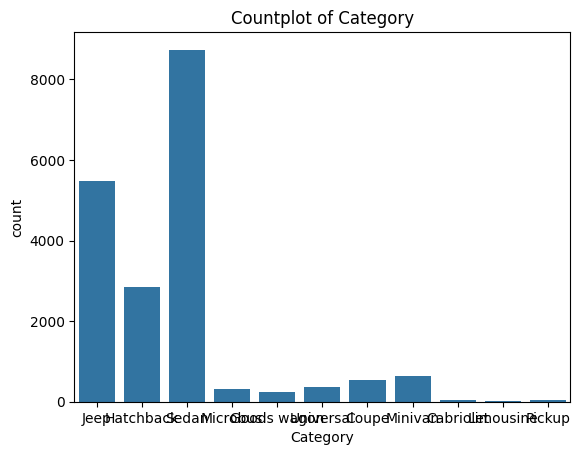

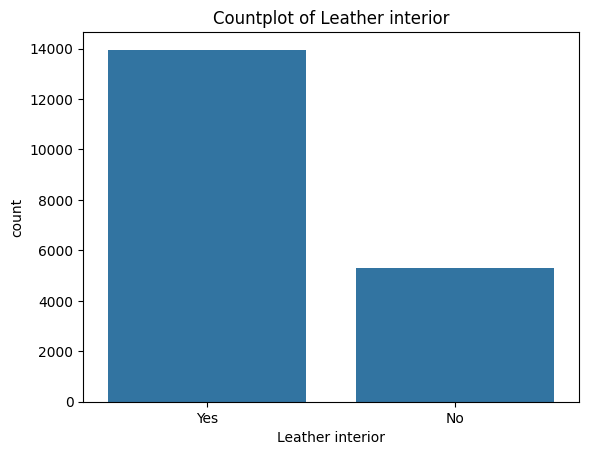

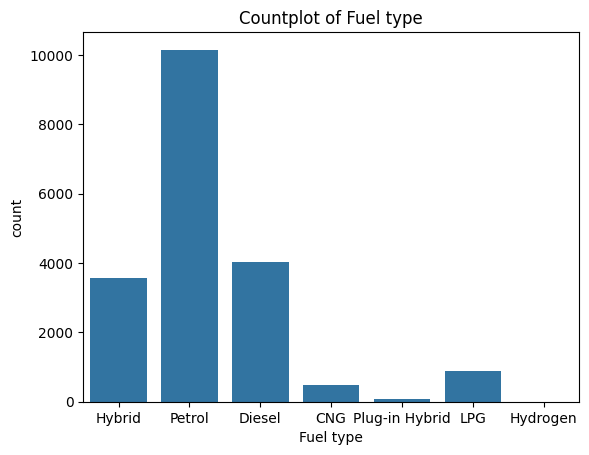

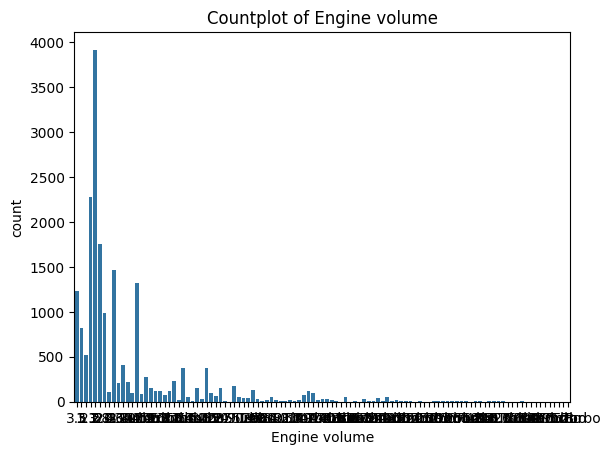

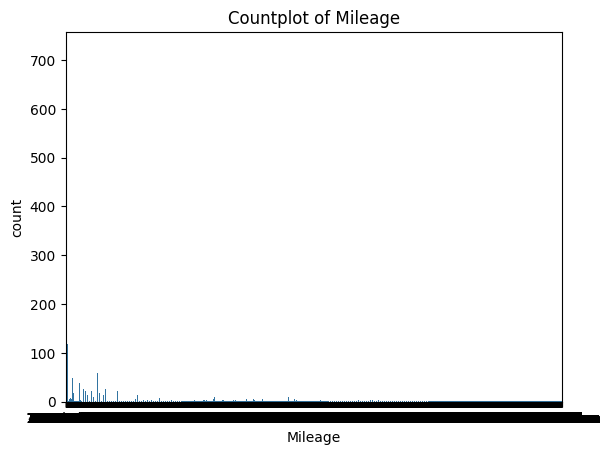

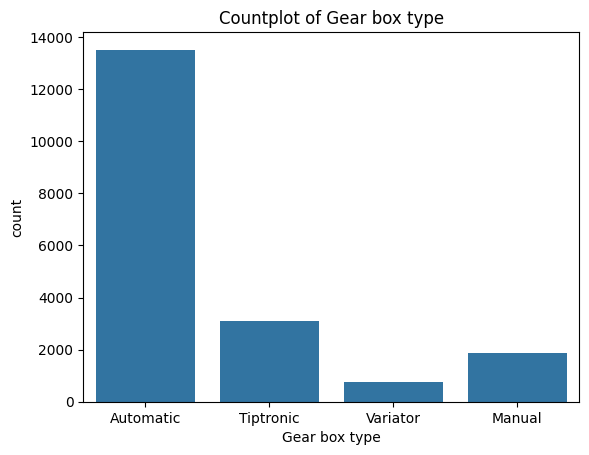

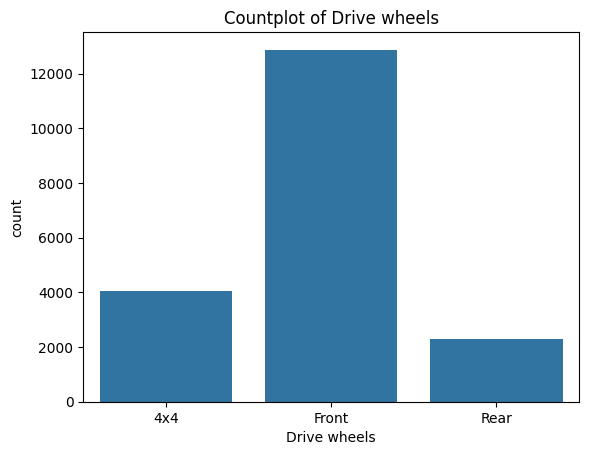

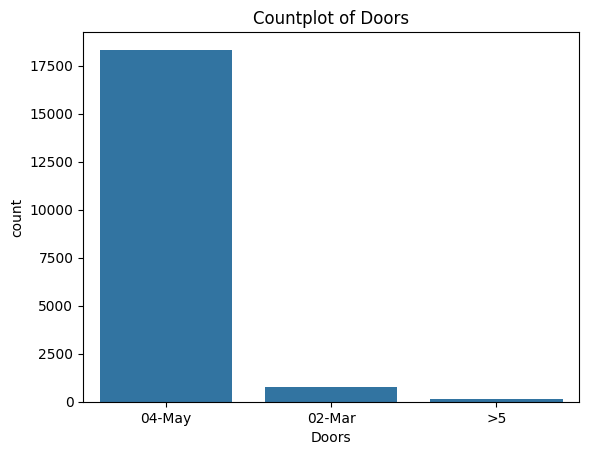

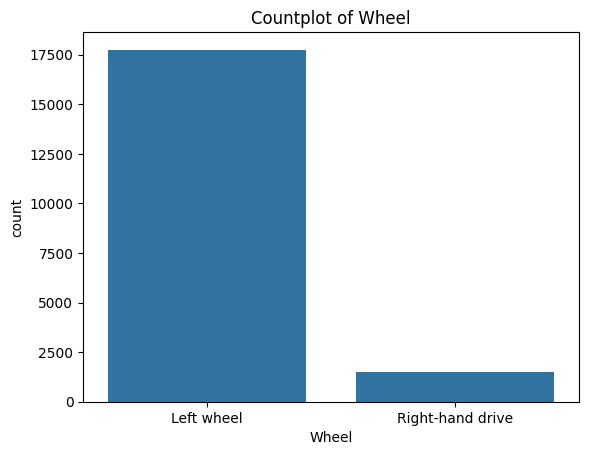

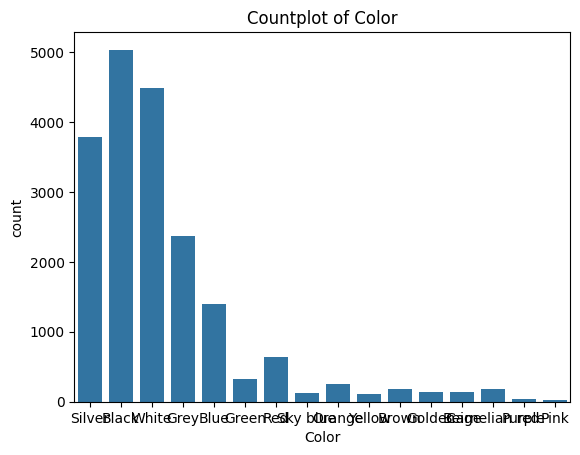

In [17]:
def visualize_countplot(df: pd.DataFrame) -> None:
    """Visualize countplots for categorical columns."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    plt.figure(figsize=(13, 9))
    for col in categorical_cols:
        sns.countplot(x=df[col])
        plt.title(f"Countplot of {col}")
        plt.show()
visualize_countplot(new_df)

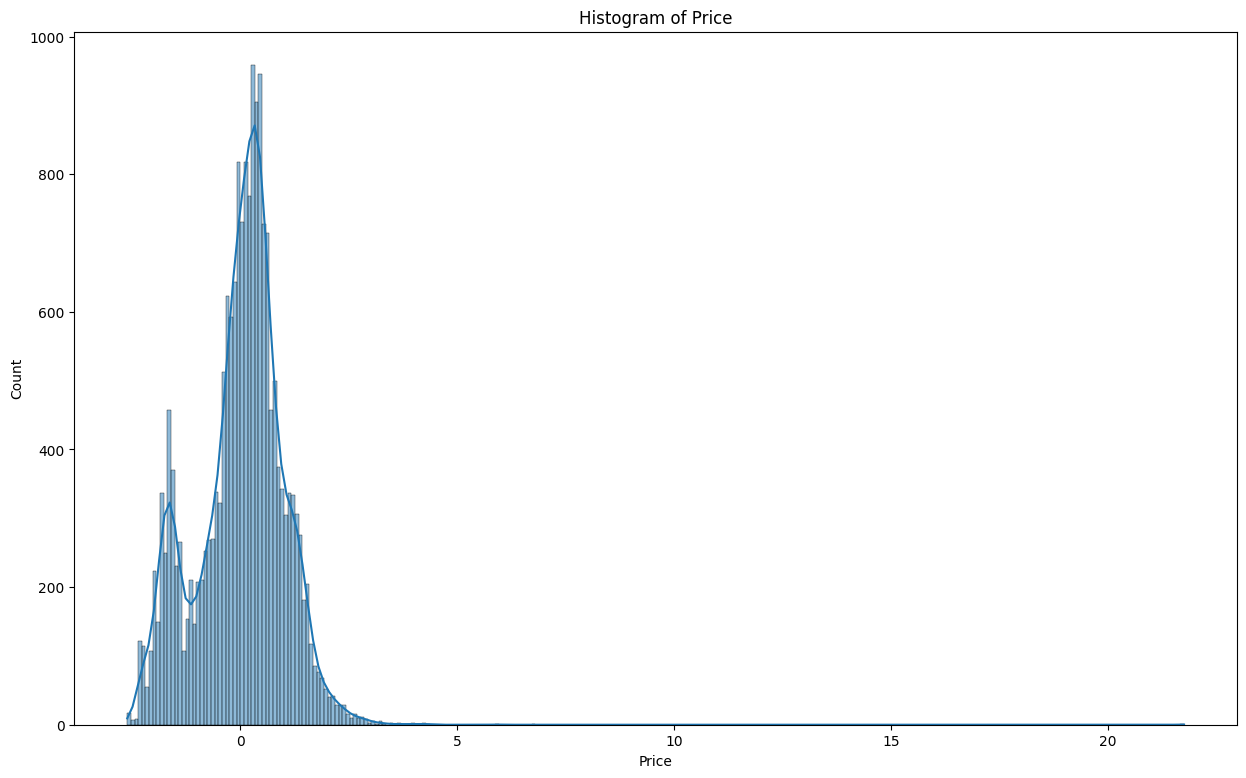

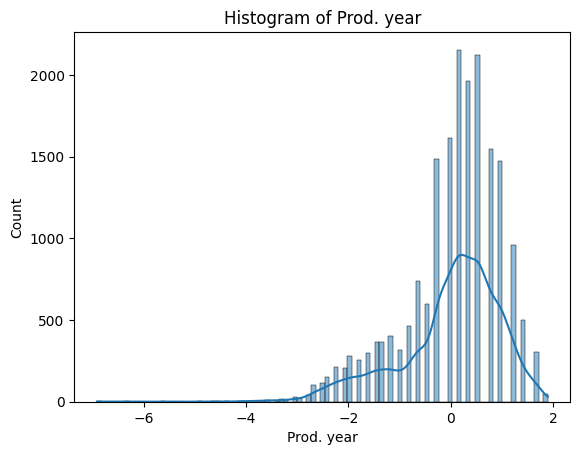

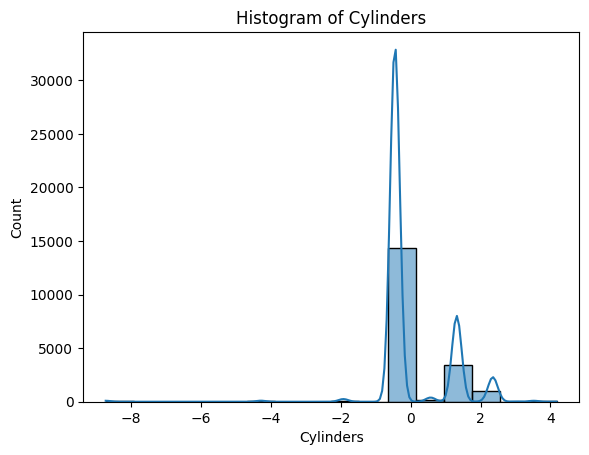

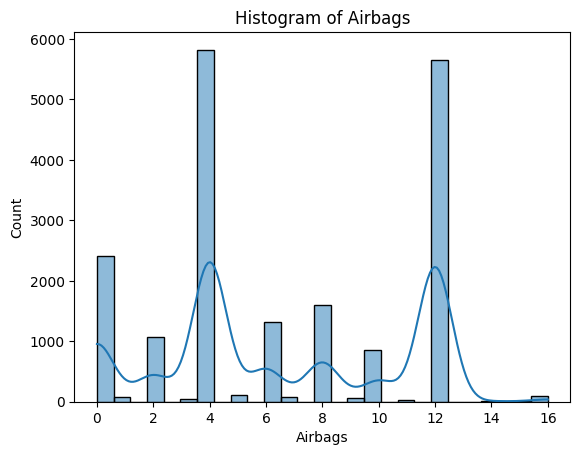

In [18]:
def visualize_histogram(df: pd.DataFrame) -> None:
    """Visualize histograms of numeric columns."""
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    plt.figure(figsize=(15, 9))
    for col in numeric_cols:
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        plt.show()

visualize_histogram(new_df)

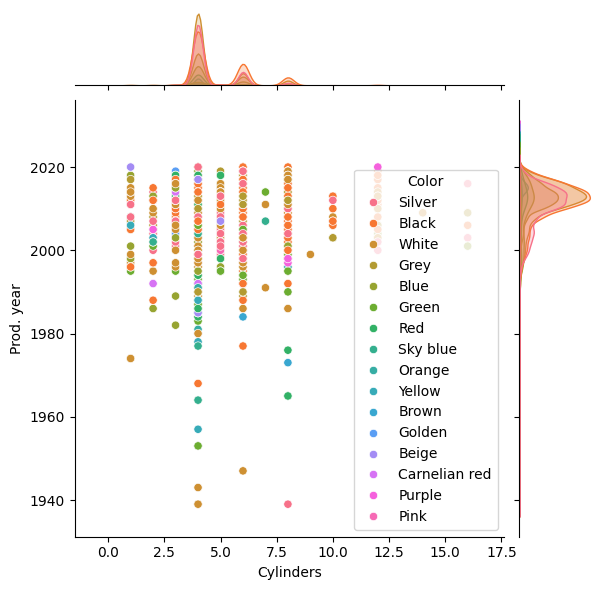

In [19]:
def visualize_jointplot(dataset: pd.DataFrame) -> None:
    sns.jointplot(x='Cylinders', y='Prod. year', data=df, hue='Color', kind='scatter')
    plt.show()
visualize_jointplot(new_df)

In [23]:
def encode_categorical_features(data: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
  """preprocess the categorical features in the dataset by encoding them with numerical labels

  Args: Data
    The dataset we want to encode

    Return:
        The dtype of the function that will be returned.
  """
  categorical_cols = data.select_dtypes(include=['object']).columns
  label_encoder = LabelEncoder()
  for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
  return data
encode_categorical_features(new_df)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0.148748,114,32,1242,-0.241878,4,1,2,63,2838,1.317939,0,0,1,0,12,12
1,0.339045,4,8,658,-0.049050,4,0,5,56,2960,1.317939,2,0,1,0,1,8
2,-0.207633,0,21,684,-0.970726,3,0,5,22,3140,-0.450737,3,1,1,1,1,2
3,-0.768031,512,16,661,-0.049050,4,1,2,46,2413,-0.450737,0,0,1,0,14,0
4,0.043588,366,21,684,0.556470,3,1,5,22,7396,-0.450737,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.207633,0,36,385,-2.096531,1,1,0,37,4394,-0.450737,1,2,0,0,12,5
19233,0.287737,504,23,1334,-0.049050,9,1,5,44,2214,-0.450737,2,1,1,0,11,8
19234,0.766354,508,23,1442,-0.241878,4,1,1,36,638,-0.450737,0,1,1,0,7,4
19235,-0.527806,83,8,456,-0.794696,4,1,1,36,5612,-0.450737,0,1,1,0,1,4


In [24]:
def replace_nan_values(data: npt.NDArray) -> npt.NDArray:
  data["Levy"] = data["Levy"].replace(0, pd.NA)
  mean_levy = data["Levy"].mean()
  data["Levy"].fillna(mean_levy, inplace=True)
  return data
replace_nan_values(new_df)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0.148748,114.000000,32,1242,-0.241878,4,1,2,63,2838,1.317939,0,0,1,0,12,12
1,0.339045,4.000000,8,658,-0.049050,4,0,5,56,2960,1.317939,2,0,1,0,1,8
2,-0.207633,338.140781,21,684,-0.970726,3,0,5,22,3140,-0.450737,3,1,1,1,1,2
3,-0.768031,512.000000,16,661,-0.049050,4,1,2,46,2413,-0.450737,0,0,1,0,14,0
4,0.043588,366.000000,21,684,0.556470,3,1,5,22,7396,-0.450737,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.207633,338.140781,36,385,-2.096531,1,1,0,37,4394,-0.450737,1,2,0,0,12,5
19233,0.287737,504.000000,23,1334,-0.049050,9,1,5,44,2214,-0.450737,2,1,1,0,11,8
19234,0.766354,508.000000,23,1442,-0.241878,4,1,1,36,638,-0.450737,0,1,1,0,7,4
19235,-0.527806,83.000000,8,456,-0.794696,4,1,1,36,5612,-0.450737,0,1,1,0,1,4


We computed correlation matrix of the independent features in the dataset, and here is the observation around the output.


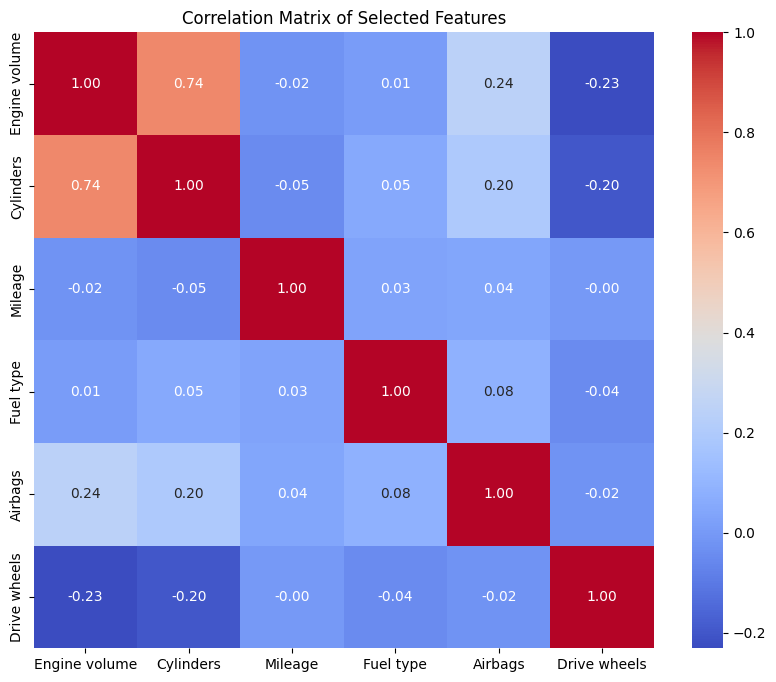

In [29]:
def compute_correl_matrix(data: npt.NDArray[np.float64], features: List = []) -> npt.NDArray[np.float64]:
    selected_df_for_corr = data[features]
    corr_matrix = selected_df_for_corr.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Selected Features")
    plt.show()
corr_matrix = compute_correl_matrix(new_df, ["Engine volume", "Cylinders", "Mileage", "Fuel type","Airbags", "Drive wheels"])
#print(corr_matrix)




#Model Training
We compare the performance of various regression models for predicting the car prices. We build five regression models and apply hyperparameter tuning using GridSearchCV for each model. Then, we evaluate each model's performance using mean squared error (MSE) on the test dataset.

Therefore, based on the MSE metric, the Random Forest model appears to be the best model for car price prediction among the models evaluated, in terms of minimizing prediction errors.

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

def training_model(dataset: pd.DataFrame, k: int = 7) -> pd.DataFrame:
    X = dataset.drop(columns=['Price'])
    y = dataset['Price']

    # Select top k features using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=10)

    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Support Vector Machine": SVR(),
        "Lasso Regression": Lasso()
    }
    results: List = []

    for name, model in models.items():
        parameters = {}
        grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)

        results.append({
            'Model Name': name,
            'Best Score': grid_search.best_score_,
            'Best Parameters': grid_search.best_params_,
            'Mean Squared Error': mse
        })

    results_df = pd.DataFrame(results)
    return results_df, selected_features

model_outcome, selected_features = training_model(new_df, k=7)
print(f"The selected features for training the model:{selected_features}")
print(model_outcome)


The selected features for training the model:Index(['Manufacturer', 'Model', 'Prod. year', 'Mileage', 'Gear box type',
       'Wheel', 'Airbags'],
      dtype='object')
               Model Name  Best Score Best Parameters  Mean Squared Error
0       Linear Regression   -0.851558              {}            0.793225
1           Decision Tree   -0.730709              {}            0.682388
2           Random Forest   -0.395714              {}            0.373477
3  Support Vector Machine   -0.981049              {}            0.927626
4        Lasso Regression   -0.990293              {}            0.937703
